In [1]:
#Setting up the problem and solving for optimal value function
import mdptoolbox, mdptoolbox.example
import numpy as np
import random
from numpy.random import seed

np.random.seed(100)
random.seed(110)

states = 100
actions = 20
stages = 10

discount= 0.99

episodes = 500
sub_episodes =100

store_values = np.zeros((episodes,1))
epsilon_store_values = np.zeros((episodes,1))
count = np.zeros((states,actions,states))

P, R = mdptoolbox.example.rand(states, actions)
fh = mdptoolbox.mdp.FiniteHorizon(P, R, discount, stages)
fh.run()
optimal_value = fh.V[0][0]

print(optimal_value)

for i in range(episodes):
    for j in range(sub_episodes):
        s = 0
        for k in range(stages):
            a = np.random.randint(actions)
            next_state = np.random.choice(states,1,p = P[a,s,:])[0]
            count[s][a][next_state] += 1
            s = next_state
    
    new_P = np.zeros((actions,states,states))
    
    for a in range(actions):
        for s1 in range(states):
            if np.sum(count[s1,a] >0):
                for s2 in range(states):
                    new_P[a,s1,s2] = count[s1,a,s2]/(np.sum(count[s1,a]))
            else:
                new_P[a,s1,s1] = 1
                
                
    fh = mdptoolbox.mdp.FiniteHorizon(new_P, R, discount, stages)
    fh.run()
    value = fh.V[0][0]
    
    print(value)
    store_values[i][0] = np.linalg.norm(value-optimal_value)
                

5.395175154028806
9.328082039339934
9.197451787282313
9.126319812176337
9.044036219301951
8.879439262969752
8.74419137159617
8.635562447655792
8.242682989351296
8.37015935352197
8.285251372832361
7.970201204275357
7.678851141514424
7.463192789170761
7.384581987848629
7.293135827623479
7.258704829673836
7.1700399991414026
6.839908278449921
6.709365808731893
6.702979298023285
6.655371353724306
6.640012903818288
6.576074436737211
6.52590315900214
6.491571695191808
6.411872437487631
6.393148824199128
6.373117495900688
6.329750064393787
6.312553162606753
6.286371292514269
6.287930729378116
6.254312660843471
6.232402220060497
6.213012442931719
6.2017084331145504
6.174480506124193
6.168112347897479
6.152471856527868
6.144720886616901
6.140317642152454
6.127967110038295
6.115256868658828
6.094975209144778
6.074776930799903
6.075294617341998
6.069285384483223
6.060403271290611
6.059386232750015
6.044955346286626
6.022702078051279
6.01371049578618
5.987786893805376
5.983828477185394
5.9732972799

5.474448460338458
5.474846808480126
5.474997914694043
5.4740823054595165
5.472924905244211
5.473735658580104
5.4744938077515855
5.474568741550025
5.474118795293375
5.472895563292913
5.4723348295423655
5.472840585851866
5.473003875895705
5.472764627200836
5.47251450809893
5.473938352171178
5.474495051827407
5.473289342831155
5.4715853794385
5.471963683831493
5.471975485257511
5.47163980527828
5.470962784057162
5.470109933423173
5.470236979950057
5.470336261433899
5.470109297518178
5.470079220308964
5.46810726055204
5.46813524867038
5.468792871917337
5.467982677701445
5.467135622269633
5.466932433098793
5.466306991112166
5.467331016991226
5.467382540617489
5.46703433216412
5.466487299514966
5.46643710919941
5.467659568864818
5.468967210833852
5.468748691070448
5.4685590808666324
5.468391702003075


In [2]:
#Computing the best action (pivot) 
def get_pivot(state,states,actions):
    p1 = 0
    p2= 0
    for s2 in range(0,states):
        for a in range(0,actions):
#             print(p1,p2)
            count = 0
            prob = R[a,state,s2]/(R[a,state,s2] + R[p2,state,p1])
            for i in range(1000):
                count += np.random.choice(2,1,p = [prob,1-prob])
            if count < 490:
                p1 = s2
                p2 = a
    return [p1,p2]
                                

In [3]:
#Computing the approximate rewards
def get_rewards(state,action,next_state,R):
    count = 1
    count_pivot = 1
    while count_pivot+count < 1000:
        p1 = R[action,state,next_state]/(1 + R[action,state,next_state])
        x = np.random.choice(2,1,p = [p1,1-p1])
        if x == 0:
            count +=1
        else:
            count_pivot +=1
    return count/count_pivot
    

In [4]:
#Running UCFH algorithm 
epsilon_count = np.zeros((states,actions,states))
# constant = 3
# mod_R = R + 0.1/(constant*stages*(np.sqrt(states*states*actions)))
pivot1 = np.zeros((states,1))
pivot2 = np.zeros((states,1))

for s1 in range(states):
    x = get_pivot(s1,states,actions)
#     print(x)
    pivot1[s1,0] = x[0]
    pivot2[s1,0] = x[1]
    

mod_R = np.zeros((actions,states,states))
for s1 in range(states):
    for s2 in range(states):
        for a in range(actions):
            if a == pivot2[s1,0] and s2 == pivot1[s1,0]:
                mod_R[a,s1,s2] = 1
            else:
                mod_R[a,s1,s2] = get_rewards(s1,a,s2,R)

print('done')
for i in range(episodes):
    for j in range(sub_episodes):
        s = 0
        for k in range(stages):
            a = np.random.randint(actions)
            next_state = np.random.choice(states,1,p = P[a,s,:])[0]
            epsilon_count[s][a][next_state] += 1
            s = next_state
    
    new_P = np.zeros((actions,states,states))
    
    for a in range(actions):
        for s1 in range(states):
            if np.sum(epsilon_count[s1,a] >0):
                for s2 in range(states):
                    new_P[a,s1,s2] = epsilon_count[s1,a,s2]/(np.sum(epsilon_count[s1,a]))
            else:
                new_P[a,s1,s1] = 1
                
                
    fh = mdptoolbox.mdp.FiniteHorizon(new_P, mod_R, discount, stages)
    fh.run()
    value = fh.V[0][0]
    
    print(value)
    epsilon_store_values[i][0] = np.linalg.norm(value-optimal_value)
                

done
9.95096450090504
9.86359200669729
9.753113247238552
9.795426253855743
9.62602414738303
9.49198774252408
9.221988902518431
8.650404795553612
8.425442193367061
8.313165592324768
8.164220417588778
7.784840525445605
7.438514988987253
7.244749543242083
7.102405276930115
6.932228088372866
6.863080250558901
6.868970189718088
6.756100240026709
6.697320187634683
6.646125600790483
6.597920352648812
6.601558163335364
6.54601841669084
6.508532965479056
6.4848210520224505
6.493847030340961
6.482303242817136
6.438030978283831
6.405465266028342
6.376677795758839
6.364643503087866
6.349550630067149
6.308380465169863
6.285166308936841
6.266845033471037
6.231761714099887
6.212345776707497
6.187693169829922
6.178839506696239
6.153963396900181
6.137630344229349
6.134328222476549
6.139644220805725
6.1150588953749665
6.112529480104245
6.1066864871659
6.106811629751705
6.099415556386163
6.09093222716627
6.077026761669603
6.068313241453475
6.058138983488479
6.055024372520485
6.03979056568334
6.0395312909

5.522634962901554
5.521662253672645
5.522447311004174
5.522039347897234
5.521346969651233
5.521210327719047
5.520550765567245
5.5192875135439285
5.519063372385688
5.519679947729294
5.519133542871841
5.519302724131606
5.520609187616049
5.520217436363756
5.5200414578440204
5.520713527944698
5.521164989445892
5.5209443103207345
5.521306164197683
5.521477751340568
5.520462064605816
5.520643344065639
5.521072649827036
5.520802483573142
5.520510927727822
5.518445008928421
5.517765458731945
5.517917310395114
5.517437701146794
5.516960565590568
5.515952532364098
5.515189598184367
5.5151621808969145
5.516158747278639
5.515661858861113
5.514154807423655
5.513958461966975
5.514219778545095
5.514550152641711
5.513495272364807
5.513002245752092
5.512508373999854
5.513609179975061
5.5129388450369605
5.51321942366987


In [12]:
print(store_values[499],epsilon_store_values[499])
# np.savetxt('actual_rewards',store_values)
# np.savetxt('modified_rewards',epsilon_store_values)

[0.07321655] [0.11804427]


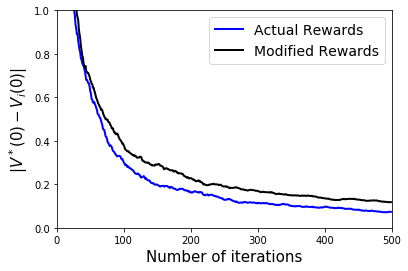

In [9]:
import matplotlib.pyplot as plt
import pylab 
plt.plot(store_values,'b',linewidth = 2, label = 'Actual Rewards')
plt.plot(epsilon_store_values,'k',linewidth = 2, label = 'Modified Rewards')
pylab.axis([0, 500, 0, 1])
pylab.legend(loc = 'upper right',prop={'size': 14})
pylab.xlabel('Number of iterations',fontsize = 15)
pylab.ylabel('$|V^*(0) - V_{i}(0)|$',fontsize = 15)
pylab.show()



In [7]:
np.linalg.norm(R-mod_R)

16.933311246112115

In [8]:
for i in range(states):
    print(pivot1[i],pivot2[i],R[int(pivot2[i,0]),i,int(pivot1[i,0])])

[87.] [14.] 0.989480678161077
[95.] [8.] 0.9799394264143293
[99.] [15.] 0.9770963910298864
[99.] [17.] 0.9862851571429178
[98.] [8.] 0.9830820293521021
[94.] [15.] 0.9991247729614865
[99.] [0.] 0.9984844236684975
[97.] [14.] 0.9982026631822495
[99.] [17.] 0.9916497476564282
[91.] [1.] 0.9981844632436141
[99.] [9.] 0.9829335520634715
[99.] [3.] 0.9832639395548786
[83.] [0.] 0.9885901815839115
[99.] [1.] 0.9922107838592723
[98.] [18.] 0.978694180123348
[98.] [15.] 0.9023941415702843
[94.] [11.] 0.9691213056002819
[98.] [7.] 0.9764304038949252
[94.] [15.] 0.9915578667105706
[91.] [5.] 0.993056118965442
[99.] [15.] 0.9933150989905521
[95.] [4.] 0.987080352047364
[95.] [10.] 0.9900647023146206
[96.] [19.] 0.9834345476229507
[99.] [11.] 0.9927165270643059
[97.] [8.] 0.9731328880212119
[99.] [1.] 0.9722657841146207
[98.] [14.] 0.9986805982631018
[99.] [19.] 0.9551101895597046
[95.] [18.] 0.993831275993308
[97.] [10.] 0.9936655032976529
[98.] [0.] 0.9914106421137285
[99.] [8.] 0.99362617911826